# Data modeling

## Library import

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse

## Data import

In [3]:
df = pd.read_parquet('../data/interim/df_log_data_baseline.parquet')

In [4]:
df

,log_MSSubClass,log_LotArea,log_OverallQual,log_OverallCond,log_YearBuilt,log_YearRemodAdd,log_MasVnrArea,log_BsmtFinSF1,log_BsmtFinSF2,log_BsmtUnfSF,...,log_WoodDeckSF,log_OpenPorchSF,log_EnclosedPorch,log_3SsnPorch,log_ScreenPorch,log_PoolArea,log_MiscVal,log_MoSold,log_YrSold,log_SalePrice
0,4.094345,9.041922,1.945910,1.609438,7.602401,7.602401,5.283204,6.561031,0.000000,5.017280,...,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,0.693147,7.604894,12.247694
1,2.995732,9.169518,1.791759,2.079442,7.588830,7.588830,0.000000,6.886532,0.000000,5.652489,...,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.609438,7.604396,12.109011
2,4.094345,9.328123,1.945910,1.609438,7.601402,7.601902,5.093750,6.188264,0.000000,6.075346,...,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,2.197225,7.604894,12.317167
3,4.248495,9.164296,1.945910,1.609438,7.557473,7.585789,0.000000,5.379897,0.000000,6.293419,...,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,0.693147,7.603898,11.849398
4,4.094345,9.565214,2.079442,1.609438,7.600902,7.600902,5.860786,6.486161,0.000000,6.196444,...,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,2.484907,7.604894,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.094345,8.976768,1.791759,1.609438,7.600402,7.600902,0.000000,0.000000,0.000000,6.860664,...,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,2.079442,7.604396,12.072541
1456,2.995732,9.486076,1.791759,1.791759,7.589842,7.594884,4.787492,6.673298,5.099866,6.380123,...,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.693147,7.605890,12.254863
1457,4.248495,9.109636,1.945910,2.197225,7.570959,7.603898,0.000000,5.620401,0.000000,6.777647,...,0.000000,4.110874,0.000000,0.0,0.0,0.0,7.824446,1.609438,7.605890,12.493130
1458,2.995732,9.181632,1.609438,1.791759,7.575585,7.598900,0.000000,3.912023,6.937314,0.000000,...,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.000000,1.386294,7.605890,11.864462


## Data inspection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   log_MSSubClass     1460 non-null   float64
 1   log_LotArea        1460 non-null   float64
 2   log_OverallQual    1460 non-null   float64
 3   log_OverallCond    1460 non-null   float64
 4   log_YearBuilt      1460 non-null   float64
 5   log_YearRemodAdd   1460 non-null   float64
 6   log_MasVnrArea     1460 non-null   float64
 7   log_BsmtFinSF1     1460 non-null   float64
 8   log_BsmtFinSF2     1460 non-null   float64
 9   log_BsmtUnfSF      1460 non-null   float64
 10  log_TotalBsmtSF    1460 non-null   float64
 11  log_1stFlrSF       1460 non-null   float64
 12  log_2ndFlrSF       1460 non-null   float64
 13  log_LowQualFinSF   1460 non-null   float64
 14  log_GrLivArea      1460 non-null   float64
 15  log_BsmtFullBath   1460 non-null   float64
 16  log_BsmtHalfBath   1460 

There is no null data. The dataset is ready to use.

## Data split

In [6]:
X = df.drop(['log_SalePrice'], axis=1)

In [7]:
y = df['log_SalePrice']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

## Training the model

In [9]:
X_train_com_constante = sm.add_constant(X_train)

In [10]:
modelo_estatsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()

In [11]:
modelo_estatsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     224.6
Date:                Sun, 10 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:11:15   Log-Likelihood:                 615.08
No. Observations:                1168   AIC:                            -1158.
Df Residuals:                    1132   BIC:                            -975.9
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                31.8045     50.866      0.625      0.532     -67.997     131.606
log_MSSubClass       -0.0235      0.009     -2.579      0.010      -0.041      -0.006
log_LotArea           0.0864      0.011      7.908      0.000       0.065       0.108
log_OverallQual       0.3542      0.030     11.623      0.000       0.294       0.414
log_OverallCond       0.2245      0.026      8.520      0.000       0.173       0.276
log_YearBuilt         5.1855      0.660      7.860      0.000       3.891       6.480
log_YearRemodAdd      2.3076      0.626      3.684      0.000       1.078       3.537
log_MasVnrArea       -0.0006      0.002     -0.308      0.758      -0.004       0.003
log_BsmtFinSF1        0.0089      0.002      4.287      0.000       0.005       0.013
log_BsmtFinSF2       -0.0050      0.003     -1.949      0.052      -0.010    3.46e-05
log_BsmtUnfSF        -0.0019      0.004     -0.525      0.599      -0.009       0.005
log_TotalBsmtSF       0.0130      0.006      2.300      0.022       0.002       0.024
log_1stFlrSF         -0.0247      0.056     -0.445      0.656      -0.134       0.084
log_2ndFlrSF         -0.0129      0.006     -2.339      0.020      -0.024      -0.002
log_LowQualFinSF     -0.0114      0.007     -1.663      0.097      -0.025       0.002
log_GrLivArea         0.5530      0.069      7.986      0.000       0.417       0.689
log_BsmtFullBath      0.0548      0.017      3.131      0.002       0.020       0.089
log_BsmtHalfBath      0.0187      0.028      0.658      0.511      -0.037       0.075
log_FullBath          0.0532      0.033      1.614      0.107      -0.011       0.118
log_HalfBath          0.0307      0.019      1.618      0.106      -0.007       0.068
log_BedroomAbvGr     -0.1623      0.028     -5.775      0.000      -0.217      -0.107
log_KitchenAbvGr     -0.2333      0.063     -3.710      0.000      -0.357      -0.110
log_TotRmsAbvGrd      0.0881      0.037      2.367      0.018       0.015       0.161
log_Fireplaces        0.0412      0.014      2.992      0.003       0.014       0.068
log_GarageYrBlt       0.3441      0.667      0.516      0.606      -0.965       1.654
log_GarageCars        0.2216      0.034      6.494      0.000       0.155       0.289
log_GarageArea       -0.0210      0.007     -3.157      0.002      -0.034      -0.008
log_WoodDeckSF        0.0048      0.002      2.607      0.009       0.001       0.008
log_OpenPorchSF      -0.0006      0.002     -0.260      0.795      -0.005       0.004
log_EnclosedPorch     0.0041      0.003      1.403      0.161      -0.002       0.010
log_3SsnPorch         0.0054      0.006      0.844      0.399      -0.007       0.018
log_ScreenPorch       0.0102      0.003      3.142      0.002       0.004       0.017
log_PoolArea         -0.0201      0.010     -2.063      0.039      -0.039

In [12]:
columns_to_drop = [
    'log_MasVnrArea',
    'log_BsmtUnfSF', 
    'log_1stFlrSF', 
    'log_BsmtHalfBath', 
    'log_GarageYrBlt', 
    'log_OpenPorchSF', 
    'log_3SsnPorch', 
    'log_MiscVal', 
    'log_MoSold', 
    'log_EnclosedPorch',
    'log_FullBath',
    'log_HalfBath']

X = X.drop(columns_to_drop, axis=1)


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   log_MSSubClass    1460 non-null   float64
 1   log_LotArea       1460 non-null   float64
 2   log_OverallQual   1460 non-null   float64
 3   log_OverallCond   1460 non-null   float64
 4   log_YearBuilt     1460 non-null   float64
 5   log_YearRemodAdd  1460 non-null   float64
 6   log_BsmtFinSF1    1460 non-null   float64
 7   log_BsmtFinSF2    1460 non-null   float64
 8   log_TotalBsmtSF   1460 non-null   float64
 9   log_2ndFlrSF      1460 non-null   float64
 10  log_LowQualFinSF  1460 non-null   float64
 11  log_GrLivArea     1460 non-null   float64
 12  log_BsmtFullBath  1460 non-null   float64
 13  log_BedroomAbvGr  1460 non-null   float64
 14  log_KitchenAbvGr  1460 non-null   float64
 15  log_TotRmsAbvGrd  1460 non-null   float64
 16  log_Fireplaces    1460 non-null   float64


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [15]:
X_train_com_constante = sm.add_constant(X_train)

In [16]:
modelo_estatsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()

In [17]:
modelo_estatsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_SalePrice   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     342.3
Date:                Sun, 10 Jul 2022   Prob (F-statistic):               0.00
Time:                        21:11:15   Log-Likelihood:                 610.41
No. Observations:                1168   AIC:                            -1173.
Df Residuals:                    1144   BIC:                            -1051.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               37.4182     50.049      0.748      0.455     -60.780     135.617
log_MSSubClass      -0.0223      0.009     -2.516      0.012      -0.040      -0.005
log_LotArea          0.0848      0.011      7.941      0.000       0.064       0.106
log_OverallQual      0.3592      0.030     12.009      0.000       0.301       0.418
log_OverallCond      0.2190      0.026      8.461      0.000       0.168       0.270
log_YearBuilt        5.4582      0.480     11.380      0.000       4.517       6.399
log_YearRemodAdd     2.5623      0.601      4.264      0.000       1.383       3.741
log_BsmtFinSF1       0.0093      0.002      4.905      0.000       0.006       0.013
log_BsmtFinSF2      -0.0040      0.002     -1.693      0.091      -0.009       0.001
log_TotalBsmtSF      0.0109      0.004      2.621      0.009       0.003       0.019
log_2ndFlrSF        -0.0088      0.002     -3.979      0.000      -0.013      -0.004
log_LowQualFinSF    -0.0109      0.006     -1.754      0.080      -0.023       0.001
log_GrLivArea        0.5456      0.032     16.807      0.000       0.482       0.609
log_BsmtFullBath     0.0501      0.016      3.107      0.002       0.018       0.082
log_BedroomAbvGr    -0.1553      0.027     -5.714      0.000      -0.209      -0.102
log_KitchenAbvGr    -0.2286      0.062     -3.714      0.000      -0.349      -0.108
log_TotRmsAbvGrd     0.0819      0.037      2.215      0.027       0.009       0.155
log_Fireplaces       0.0409      0.014      3.026      0.003       0.014       0.067
log_GarageCars       0.2342      0.032      7.226      0.000       0.171       0.298
log_GarageArea      -0.0233      0.006     -3.798      0.000      -0.035      -0.011
log_WoodDeckSF       0.0048      0.002      2.621      0.009       0.001       0.008
log_ScreenPorch      0.0094      0.003      2.925      0.004       0.003       0.016
log_PoolArea        -0.0214      0.010     -2.225      0.026      -0.040      -0.003
log_YrSold         -12.0880      6.579     -1.837      0.066     -24.997       0.821
==============================================================================
Omnibus:                      483.380   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7316.700
Skew:                          -1.495   Prob(JB):                         0.00
Kurtosis:                      14.891   Cond. No.                     2.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Results graph analysis 

In [19]:
X_test_com_constante = sm.add_constant(X_test)

In [21]:
y_previsto_test = modelo_estatsmodels.predict(X_test_com_constante)

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='log do Preço - Previsão', ylabel='log do Preço - Real'>

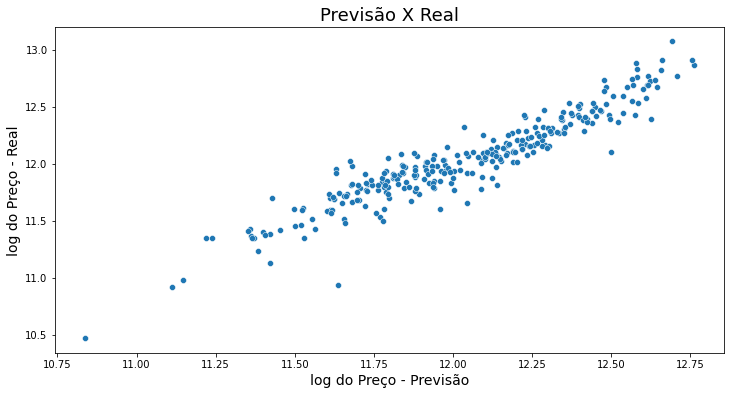

In [23]:
ax = sns.scatterplot(x=y_previsto_test, y=y_test)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

## Residual values

In [24]:
residuo = y_test - y_previsto_test

C:\Users\Marco De Amicis\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='log do Preço', ylabel='Density'>

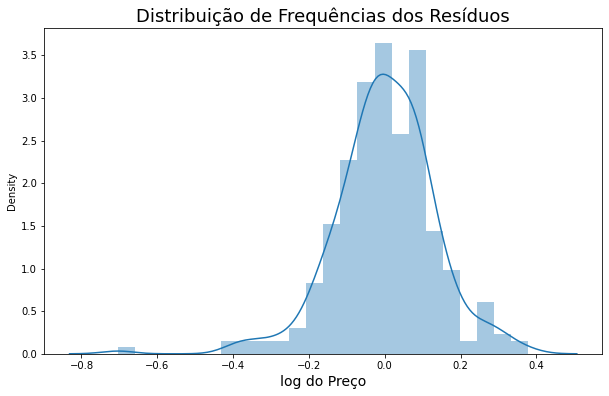

In [25]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(10, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
ax

In [29]:
print(f"RMSE: {sm.tools.eval_measures.rmse(y_test, y_previsto_test, axis=0):.2f}")

RMSE: 0.13


In [42]:
erro = pd.concat([y_test, y_previsto_test, np.exp(y_test), np.exp(y_previsto_test), ((np.exp(y_test) - np.exp(y_previsto_test)).round(2))**2], axis=1)
erro

,log_SalePrice,0,log_SalePrice,1,2
812,10.932982,11.636755,55993.0,113182.284037,3.270614e+09
272,12.577636,12.609054,290000.0,299255.715008,8.566835e+07
294,12.025749,12.153027,167000.0,189667.322465,5.138074e+08
452,12.225875,12.235702,204000.0,206014.469381,4.058089e+06
1002,12.354493,12.438053,232000.0,252218.962401,4.088063e+08
...,...,...,...,...,...
232,11.456355,11.499790,94500.0,98695.045819,1.759844e+07
1248,11.771436,12.004627,129500.0,163509.680274,1.156658e+09
881,12.141534,12.296786,187500.0,218990.919807,9.916780e+08
304,12.594731,12.535906,295000.0,278147.336735,2.840121e+08


In [44]:
(erro[2].sum()/len(erro))**0.5

25320.68461099129